In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

In [152]:
time_train

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time,window,route
window,,,,,,,,
2016-07-19 00:00:00,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85,2016-07-19 00:00:00,B-3
2016-07-19 00:20:00,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79,2016-07-19 00:20:00,B-3
2016-07-19 00:20:00,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76,2016-07-19 00:20:00,B-1
2016-07-19 00:20:00,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05,2016-07-19 00:20:00,A-2
2016-07-19 00:40:00,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98,2016-07-19 00:40:00,B-1
2016-07-19 00:40:00,C,3,1072812,2016-07-19 00:56:31,115#2016-07-19 00:56:31#10.97;102#2016-07-19 0...,113.54,2016-07-19 00:40:00,C-3
2016-07-19 01:20:00,B,1,1014648,2016-07-19 01:26:03,105#2016-07-19 01:26:03#16.85;100#2016-07-19 0...,176.70,2016-07-19 01:20:00,B-1
2016-07-19 01:20:00,A,2,1063919,2016-07-19 01:36:04,110#2016-07-19 01:36:04#10.39;123#2016-07-19 0...,74.47,2016-07-19 01:20:00,A-2
2016-07-19 01:20:00,A,3,1064408,2016-07-19 01:36:20,110#2016-07-19 01:36:20#8.58;123#2016-07-19 01...,94.57,2016-07-19 01:20:00,A-3


# Prepare

In [3]:
time_train = pd.read_csv("dataSets/training/trajectories(table 5)_training.csv", header=0)

In [4]:
routes = [u'A-2', u'A-3', u'B-1', u'B-3', u'C-1', u'C-3']

In [5]:
def map_time_window(r, field):
    stime = datetime.strptime(r[field], "%Y-%m-%d %H:%M:%S")
    time_window_start = datetime(stime.year, stime.month, stime.day, stime.hour, stime.minute / 20 * 20)
    return time_window_start
    
time_train['window'] = time_train.apply(lambda r: map_time_window(r, 'starting_time'), 1)

In [6]:
def route(r):
    return r['intersection_id'] + '-' + str(r['tollgate_id'])
time_train['route'] = time_train.apply(lambda r: route(r), 1)

In [7]:
time_train.index = time_train['window']

In [8]:
history_mean = time_train.groupby([lambda x: (x.isoweekday(), x.hour, x.minute), 'route'])['travel_time'].mean()

In [9]:
hour_minute_mean = time_train.groupby([lambda x: (x.hour, x.minute), 'route'])['travel_time'].mean()

In [10]:
travel_time_feature = time_train.groupby([lambda x: x, 'route'])['travel_time'].describe()

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(time_train.travel_time.values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# scaler.transform(time_train.travel_time.values.reshape(-1, 1)).reshape(-1)
# time_train.travel_time.values
# time_train.groupby([lambda x: x, 'route'])['travel_time'].mean().plot()

# Travel Time

In [17]:
out_file_path = 'test_20min_avg_travel_time.csv'
fw = open(out_file_path, 'w')
fw.writelines(','.join(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time']) + '\n')
for route in routes:
    for day in range(18, 25):
        for hour in [8, 17]:
            time_window_start = datetime(2016, 10, day, hour, 0)
            time_window_end = time_window_start + timedelta(hours=2)
            for t in pd.date_range(time_window_start, end=time_window_end, freq='20min', closed='left'):

                avg_tt = history_mean[(t.isoweekday(), t.hour, t.minute), route]
                out_line = ','.join([route.split('-')[0], route.split('-')[1],
                                 '"[' + str(t) + ',' + str(t + timedelta(minutes=20)) + ')"',
                                 str(avg_tt)]) + '\n'
                fw.writelines(out_line)
fw.close()        

In [18]:
from IPython.display import FileLink
FileLink(out_file_path)

/home/zhli7/kdd2017/test_20min_avg_travel_time.csv

# Volume

In [18]:
volume_train = pd.read_csv("dataSets/training/volume(table 6)_training.csv", header=0)
volume_train['window'] = volume_train.apply(lambda r: map_time_window(r, 'time'), 1)
volume_train.index = volume_train['window']
volume_history_grouped = volume_train.groupby([lambda x: (x.isoweekday(), x.hour, x.minute), 'tollgate_id', 'direction'])
volume_history_mean = volume_history_grouped['window'].count()

In [21]:
volume_test_file_path = "test_20min_avg_volume.csv"
fw = open(volume_test_file_path, 'w')
fw.writelines(','.join(['tollgate_id', 'time_window', 'direction', 'volume']) + '\n')

for day in range(18, 25):
    for hour in [8, 15]:
        time_window_start = datetime(2016, 10, day, hour, 0)
        time_window_end = time_window_start + timedelta(hours=2)
        for t in pd.date_range(time_window_start, end=time_window_end, freq='20min', closed='left'):
            for tollgate_id in [1, 2, 3]:
                for direction in [0, 1]:
                    try:
                        volume = volume_history_mean[(t.isoweekday(), t.hour, t.minute), tollgate_id, direction]
                        out_line = ','.join([str(tollgate_id), 
                                         '"[' + str(t) + ',' + str(t+timedelta(minutes=20)) + ')"',
                                         str(direction),
                                         str(volume)
                                       ]) + '\n'
                        fw.writelines(out_line)
                    except KeyError:
                        pass                         
fw.close()

In [22]:
from IPython.display import FileLink
FileLink(volume_test_file_path)

/home/zhli7/kdd2017/test_20min_avg_volume.csv

# Validation - Travel Time by History Mean

## 用历史平均作为待预测的通行时间

In [20]:
train_set = time_train[:'201610110000']
validation_set = time_train['201610110000':]

validation_true = pd.DataFrame(validation_set.groupby([lambda x: x, 'route'])['travel_time'].mean())

In [21]:
train_set_mean = train_set.groupby([lambda x: (x.isoweekday(), x.hour, x.minute), 'route'])['travel_time'].mean()
validation_day = range(11, 18)
validation_hour = [8, 17]
validation_travel_time = []
validation_start_window = []
for day in validation_day:
    for hour in validation_hour:
        time_window_start = datetime(2016, 10, day, hour, 0)
        time_window_end = time_window_start + timedelta(hours=2)
        for t in pd.date_range(time_window_start, end=time_window_end, freq='20min', closed='left'):
            for route in [u'A-2', u'A-3', u'B-1', u'B-3', u'C-1', u'C-3']:
                avg_tt = train_set_mean[(t.isoweekday(), t.hour, t.minute), route]
                validation_travel_time.append([avg_tt, route])
                validation_start_window.append(t)

validation_predict = pd.DataFrame(validation_travel_time, index=validation_start_window, columns=['travel_time', 'route'])
validation_predict = pd.DataFrame(validation_predict.groupby([lambda x: x, 'route'])['travel_time'].mean())

In [22]:
cross_validation = pd.merge(validation_predict, validation_true, left_index=True, right_index=True, how='inner')

In [23]:
def mape(ypredict, ytrue):
    return np.mean(np.abs(ypredict - ytrue) / ytrue)

print 'MAPE of History Mean: %f' % (mape(cross_validation.values[:, 0], cross_validation.values[:, 1]))
cross_validation.plot()

MAPE of History Mean: 0.213487


# LSTM

In [24]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(20,10))
sample_route = 'C-1'

Using Theano backend.


In [65]:
# routes =  [u'A-2', u'A-3', u'B-1', u'B-3', u'C-1', u'C-3']
def create_dataset(dataframe, route, travel_time_set, look_back=1, predict_forward=1):
    dataset_time_index = []
    dataset_raw = []
    for t in pd.date_range(dataframe.index[0], dataframe.index[-1], freq='20min', closed='left'):
        if t.hour > 5:
            try:
                history_feature = history_mean[(t.isoweekday(), t.hour, t.minute), route]
            except KeyError:
                history_feature = hour_minute_mean[(t.hour, t.minute), route]
                 #         day_feature = [1 if i == t.isoweekday() else 0 for i in range(1,8)] + [t.hour, t.minute]
#             day_feature = [t.isoweekday(), t.hour, t.minute, 1 if t.isoweekday() in [6,7] else 0]
        #         day_feature = [t.isoweekday()]
            day_feature = [t.hour]
        #         feature = [speed, weather[t.strftime('%Y-%m-%d')]] + day_feature
            try:
                travel_time_stat = [0.0 if math.isnan(f) else f \
                                    for f in travel_time_set[t, route][['mean', 'count', 'std', '50%']].values]
                if travel_time_stat[0] > 2 * history_feature:
                    feature = [history_feature] + day_feature
                else:
                    feature = [travel_time_stat[0]] + day_feature
            except:
                if len(dataset_raw) < 1:
                    feature = [history_mean[(t.isoweekday(), t.hour, t.minute), route]] + day_feature
                else:
                    feature = dataset_raw[-1]

            dataset_raw.append(feature)
            dataset_time_index.append(t)

    dataset = np.array(dataset_raw)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    dataset[:, 0] = scaler.fit_transform(dataset[:, 0].reshape(-1, 1)).reshape(-1)
#     dataset[:, 0] = scaler.transform(dataset[:, 0].reshape(-1, 1)).reshape(-1)
    dataX, dataY, timeIndexY = [], [], []
    for i in range(len(dataset) - look_back - predict_forward + 1):

        a = dataset[i:(i+look_back), :]

        dataX.append(a)
        dataY.append(dataset[(i+look_back):(i+look_back+predict_forward), 0])
        timeIndexY.append(dataset_time_index[(i+look_back):(i+look_back+predict_forward)])
    return (np.array(dataX), np.array(dataY), scaler, timeIndexY, 
            pd.DataFrame(scaler.inverse_transform(dataset[:, 0]), index=dataset_time_index, columns=["speed"]))

### Split Train and CV

In [66]:
train_test_split_date = '20161011'
train, cv = time_train[:train_test_split_date], time_train[train_test_split_date:]
print(len(train), len(cv))

(99475, 11124)


In [130]:
look_back = 6
trainX, trainY, trainScaler, trainYTimeIndex, trainDF = create_dataset(train, sample_route, travel_time_feature, look_back)
# testX, testY, testScaler = create_dataset(test, look_back)['A-2']

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
# testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


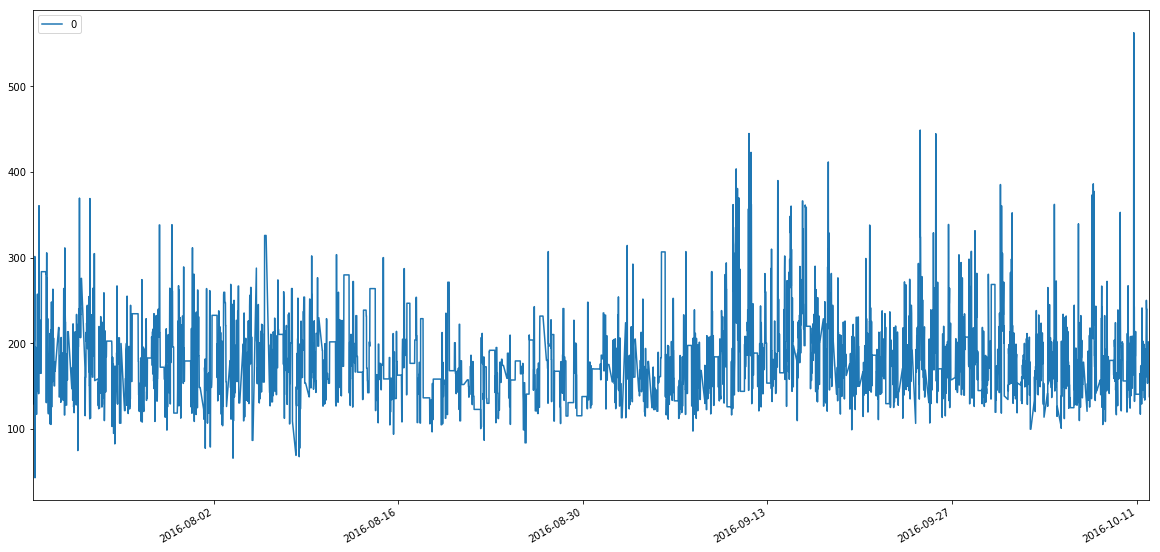

In [131]:
# plt.plot(trainScaler.inverse_transform(trainY))
trainYDataFrame = pd.DataFrame(trainScaler.inverse_transform(trainY), index=np.array(trainYTimeIndex).reshape(-1))
trainYDataFrame.plot()

### Train Model of LSTM

In [147]:
from keras.regularizers import l2, activity_l2
hidden_neurons = 4
loss_function = 'mse'
batch_size = 100
dropout = 0.02
inner_hidden_neurons = 8
dropout_inner = 0.02
out_neurons = 1
model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, trainX.shape[2]), activation='tanh', dropout_U=0.05, stateful=True, return_sequences=True))
# model.add(LSTM(8, batch_input_shape=(batch_size, look_back, trainX.shape[2]), activation='tanh', dropout_U=0.05, stateful=True))
# model.add(Dense(1))
# for i in range(100):
#     model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
#     model.reset_states()
in_neurons = trainX.shape[2]
gpu_cpu = 'cpu'
model.add(LSTM(output_dim=hidden_neurons, input_dim=in_neurons, return_sequences=True, init='uniform',
                   consume_less=gpu_cpu))
model.add(Dropout(dropout))

dense_input = inner_hidden_neurons
model.add(LSTM(output_dim=inner_hidden_neurons, input_dim=hidden_neurons, return_sequences=True, consume_less=gpu_cpu))
model.add(Dropout(dropout_inner))
model.add(LSTM(input_dim=hidden_neurons, output_dim=dense_input, return_sequences=False))
model.add(Dropout(dropout_inner))
model.add(Activation('relu'))

model.add(Dense(output_dim=out_neurons, input_dim=dense_input))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.lr = 0.001
model.fit(trainX, trainY, nb_epoch=50, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/50
4583/4583 [==============================] - 0s - loss: 0.0778     

In [148]:
trainPredict = model.predict(trainX, batch_size=batch_size)
# model.reset_states()
# testPredict = model.predict(testX, batch_size=batch_size)
trainPredict = trainScaler.inverse_transform(trainPredict)
trainYOri = trainScaler.inverse_transform(trainY)
# testPredict = testScaler.inverse_transform(testPredict)
# testY = testScaler.inverse_transform(testY)
trainScore = mape(trainPredict[:, 0], trainYOri)
print('Train Score: %.2f MAPE' % (trainScore))

# testScore = mape(testPredict[:, 0], testY)
# print('Test Score %.2f MAPE' % (testScore))

Train Score: 0.24 MAPE


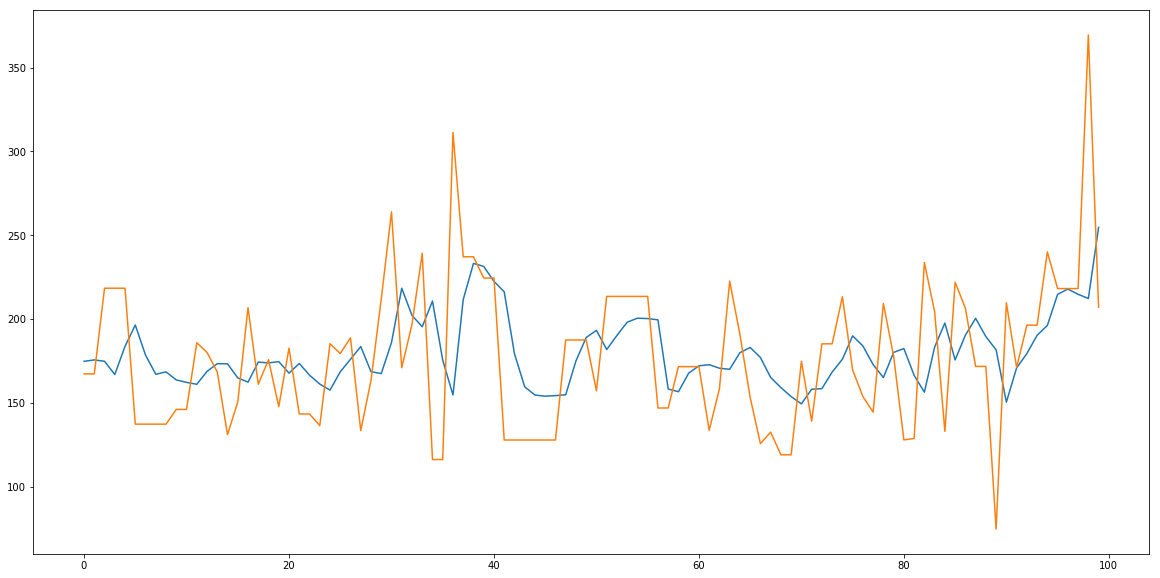

In [149]:
plt.legend(loc='best')
plt.plot(trainPredict[100:200], label='predict')
plt.plot(trainYOri[100:200], label='true')

## Cross Validation -  One Step Predict

In [150]:
all_predict = np.empty((0,0))
all_Y = np.empty((0,0))
all_time = []
for day in range(11, 18):
    for hour in [8, 17]:
        train_window_start = datetime(2016, 10, day, hour, 0) - timedelta(hours=2)
        train_window_end = train_window_start + timedelta(hours=1, minutes=59)
        predict_window_end = datetime(2016, 10, day, hour, 0) + timedelta(hours=2)
        cvX, cvY, cvScaler, cvYTime, cvDF = create_dataset(cv[train_window_start:predict_window_end], 'B-3', travel_time_feature, 6)
        cvX = np.reshape(cvX, (cvX.shape[0], cvX.shape[1], cvX.shape[2]))
        cvPredict = model.predict(cvX)
        cvPredict = cvScaler.inverse_transform(cvPredict)
        cvY = cvScaler.inverse_transform(cvY)
        if all_predict.any():
            all_predict = np.vstack((all_predict, cvPredict))
            all_Y = np.vstack((all_Y, cvY))
        else:
            all_predict = cvPredict
            all_Y = cvY
            
        all_time = all_time + list(np.reshape(cvYTime, -1))

print "cv MAPE: %f" % (mape(all_predict, all_Y))
        

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

cv MAPE: 0.217918


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 

## Plot CV

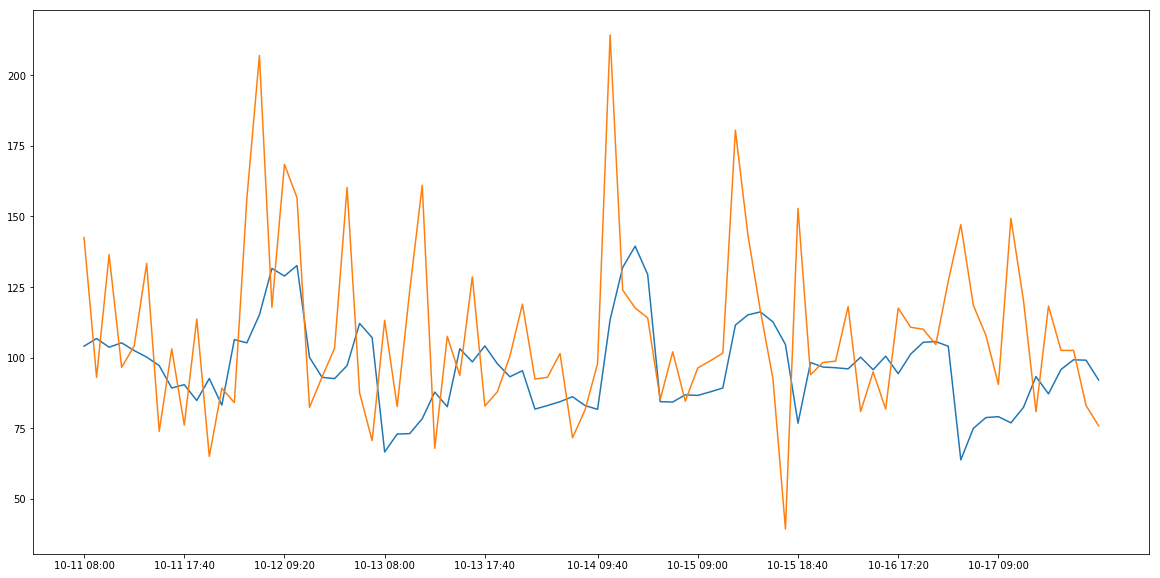

In [151]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,)
# pd.DataFrame(all_predict, index=all_time).resample('20min').mean().plot(label='predict', ax=ax)
# pd.DataFrame(all_Y, index=all_time).resample('20min').mean().plot(ax=ax)

ax.plot(all_predict, label="predict")
ax.plot(all_Y, label="true")
ticks = [i * len(all_Y) / 10 for i in range(10)]
ax.set_xticks(ticks)
ax.set_xticklabels([all_time[t].strftime("%m-%d %H:%M") for t in ticks])
# plt.legend(loc='best')

# ARMA

In [ ]:
import statsmodels.api as sm
# sample_df = pd.DataFrame(dataset[:, 0], index=dataset_time_index, columns=["speed"])
# o = sm.tsa.arma_order_select_ic(sample_df['speed'],ic='aic')['aic_min_order']
out_file_path = 'arma_test_20min_avg_travel_time.csv'
fw = open(out_file_path, 'w')
fw.writelines(','.join(['intersection_id', 'tollgate_id', 'time_window', 'avg_travel_time']) + '\n')
for route in routes:
    trainX, trainY, trainScaler, trainYTimeIndex, trainDF = create_dataset(time_train, route, travel_time_feature, 1)
    o = sm.tsa.arma_order_select_ic(trainDF['speed'], ic='aic')['aic_min_order']
    print o
    # arma_mod22 = sm.tsa.ARMA(sample_df['speed'], order=o).fit()
    arma_mod22 = sm.tsa.ARMA(trainDF['speed'], order=o).fit()
    # st = datetime.datetime.strptime('201408241100', '%Y%m%d%H%M')
    # y_predict = arma_mod22.predict(start=st.strftime('%Y%m%d%H%M'), end=(st+datetime.timedelta(minutes=30)).strftime('%Y%m%d%H%M'), dynamic=True)
    # y_predict = arma_mod22.predict(start=36*21, end=36*24, dynamic=True)
    # sm.graphics.tsa.plot_pacf(ori_dataset, lags=50)
    for day in range(18, 25):
        for hour in [8, 17]:
            time_window_start = datetime(2016, 10, day, hour, 0)
            time_window_end = time_window_start + timedelta(hours=2)
            predicted = arma_mod22.predict(time_window_start, end=time_window_end, dynamic=False)
            for t in pd.date_range(time_window_start, end=time_window_end, freq='20min', closed='left'):
                avg_tt = predicted[t]
                out_line = ','.join([route.split('-')[0], route.split('-')[1],
                                 '"[' + str(t) + ',' + str(t + timedelta(minutes=20)) + ')"',
                                 str(avg_tt)]) + '\n'
                fw.writelines(out_line)
fw.close()

# Online Result

In [ ]:
online_test_set = pd.read_csv("dataSets/testing_phase1/trajectories(table 5)_test1.csv", header=0)
for day in range(18, 25):
    for hour in [8, 15]:
        time_window_start = datetime(2016, 10, day, hour, 0)
        time_window_end = time_window_start + timedelta(hours=2)